

>  ## ***`Task 1: Logistic Regression for Binary Classification`*** ##

---
```Description:```

`Implement a logistic regression model to predict binary outcomes (e.g., whether a customer will churn).`

---
```Objectives:```

```
1. Load and preprocess the dataset.
2. Train a logistic regression model using scikit-learn.
3. Interpret model coefficients and the odds ratio.
4. Evaluate the model using metrics such as accuracy,
   precision, recall, and the ROC curve.
```

---

`Tools: Python, scikit-learn, pandas.`

`Using churn-bigml-80 dataset.`

### ***1- Import pre-processing libs*** ###

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score


### ***2- Import and Load Data*** ###

In [39]:
df = pd.read_csv(r'D:\Abdelraouf\Quran\Codveda-ML-Internship\DataSet-For-Tasks\Churn-Prdiction-Data\churn-bigml-80.csv')

In [40]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


### ***3- Exploring Data*** ###

In [41]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [42]:
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
2665,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [43]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [44]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


In [45]:
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 0


### ***4- Data Preprocessing*** ###

In [46]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [47]:
df.drop(columns=['Area code', 'State'], inplace=True)

In [48]:
df.dtypes

Account length              int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [49]:
df['International plan'].value_counts()

International plan
No     2396
Yes     270
Name: count, dtype: int64

In [50]:
df['Voice mail plan'].value_counts()

Voice mail plan
No     1933
Yes     733
Name: count, dtype: int64

In [51]:
df['Churn'].value_counts()

Churn
False    2278
True      388
Name: count, dtype: int64

In [52]:
le = LabelEncoder() # Label Encoder to convert categorical variables to numerical 
df["International plan"] = le.fit_transform(df["International plan"])
df['Voice mail plan'] = le.fit_transform(df['Voice mail plan'])
df['Churn'] = le.fit_transform(df['Churn'])

In [53]:
df.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [56]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [57]:
X

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,0,0,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2
2662,192,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
2663,68,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
2664,28,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2


In [58]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2661    0
2662    0
2663    0
2664    0
2665    0
Name: Churn, Length: 2666, dtype: int64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
scaler = StandardScaler() # Scale numerical features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### ***5- Train Logistic Regression Model*** ###

In [61]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [62]:
# Get model coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lg_model.coef_[0]
})
print('Model Coefficients:')
print(coefficients)

Model Coefficients:
                   Feature  Coefficient
0           Account length     0.043334
1       International plan     0.665739
2          Voice mail plan    -0.770813
3    Number vmail messages     0.332662
4        Total day minutes     0.371843
5          Total day calls     0.075132
6         Total day charge     0.370945
7        Total eve minutes     0.144031
8          Total eve calls     0.015161
9         Total eve charge     0.142556
10     Total night minutes     0.076920
11       Total night calls    -0.035970
12      Total night charge     0.075161
13      Total intl minutes     0.140927
14        Total intl calls    -0.281084
15       Total intl charge     0.151969
16  Customer service calls     0.620638


In [64]:
# Calculate odds ratios
odds_ratios = pd.DataFrame({
    'Feature': X.columns,
    'Odds Ratio': np.exp(lg_model.coef_[0])
})
print('\nOdds Ratios:')
print(odds_ratios)


Odds Ratios:
                   Feature  Odds Ratio
0           Account length    1.044287
1       International plan    1.945929
2          Voice mail plan    0.462637
3    Number vmail messages    1.394676
4        Total day minutes    1.450405
5          Total day calls    1.078027
6         Total day charge    1.449103
7        Total eve minutes    1.154920
8          Total eve calls    1.015276
9         Total eve charge    1.153218
10     Total night minutes    1.079955
11       Total night calls    0.964670
12      Total night charge    1.078058
13      Total intl minutes    1.151341
14        Total intl calls    0.754965
15       Total intl charge    1.164124
16  Customer service calls    1.860115


### ***6- Evaluate Logistic Regression Model*** ###

In [66]:
# Predict on test set
y_pred = lg_model.predict(X_test)
y_pred_proba = lg_model.predict_proba(X_test)[:, 1]
y_pred_proba

array([0.8455309 , 0.29700111, 0.04606275, 0.39328122, 0.33967951,
       0.37742087, 0.01891131, 0.26613821, 0.11276157, 0.16012691,
       0.16100946, 0.08909134, 0.0231831 , 0.05055569, 0.6756014 ,
       0.23860691, 0.1820145 , 0.02623223, 0.3611482 , 0.02294442,
       0.03258674, 0.0222672 , 0.01164078, 0.46694276, 0.0319573 ,
       0.11661839, 0.04144144, 0.40257643, 0.06840044, 0.13437574,
       0.09386627, 0.07949164, 0.08593079, 0.39268536, 0.06472939,
       0.05982308, 0.39345481, 0.05235433, 0.0952532 , 0.09175185,
       0.03988505, 0.10552998, 0.28692157, 0.01120148, 0.142555  ,
       0.07385845, 0.64370998, 0.14759487, 0.03632219, 0.08555694,
       0.0856099 , 0.15226236, 0.03118638, 0.01695236, 0.05621533,
       0.17508011, 0.02997454, 0.19536368, 0.18604247, 0.00488969,
       0.01370726, 0.10902206, 0.01063298, 0.07204537, 0.51338544,
       0.12438297, 0.08031048, 0.03513668, 0.02700881, 0.18632239,
       0.39634068, 0.00601624, 0.09779137, 0.00931044, 0.29207

In [73]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print('\nModel Evaluation Metrics:')
print(f'Accuracy: {accuracy:.2f}%')
print(f'Precision: {precision:.2f}%')
print(f'Recall: {recall:.2f}%')
print(f'ROC AUC Score: {roc_auc:.2f}%')


Model Evaluation Metrics:
Accuracy: 0.86%
Precision: 0.58%
Recall: 0.23%
ROC AUC Score: 0.78%


In [ ]:
# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[442  13]
 [ 61  18]]


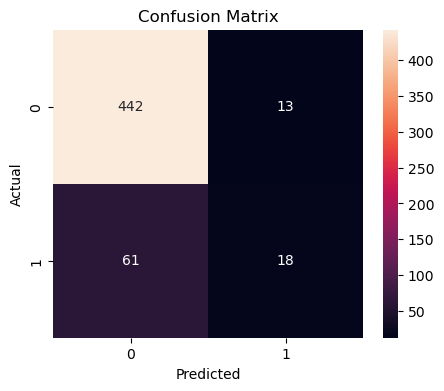

In [71]:
# visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

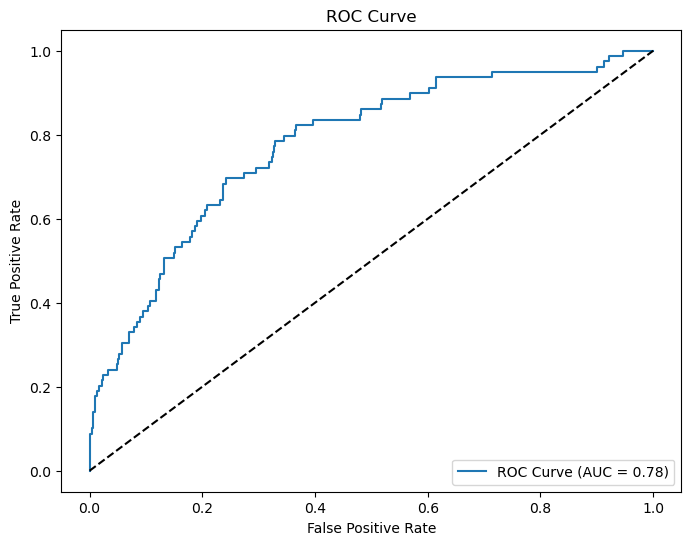

In [69]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## ***`Conclusion`*** ##

**In this notebook, we successfully implemented a Logistic Regression model for binary classification using the churn-bigml-80 dataset. The main steps included:**

---

```
1. Loaded and explored the churn dataset, checking for missing and duplicate values.
2. Preprocessed the data by encoding categorical variables and dropping irrelevant features.
3. Split the data into training and testing sets to evaluate model performance.
4. Scaled the numerical features for better model convergence.
5. Trained a logistic regression model using scikit-learn.
6. Interpreted model coefficients and calculated odds ratios to understand feature impact.
7. Evaluated the model using accuracy, precision, recall, ROC AUC score, and confusion matrix.
8. Visualized the confusion matrix and ROC curve to interpret classification results.
```

---

**These steps ensured the data was properly prepared and the logistic regression model was thoroughly evaluated, providing valuable insights into customer**